<a href="https://colab.research.google.com/github/IconOfDreamers99/IIITH-AIML/blob/main/My_notebook_of_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=0681812b1eca3c7ca1c4349cefc9cebe12539e14ab451428a179e662d6c0c9df
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [3]:
topic1 = 'Rabbit'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [5]:
fr1

"Rabbit est le nom d'un robot bipède développé par le CNRS dans le cadre du projet ROBEA, qui s'arrêta en novembre 2004.\nRabbit fut conçu pour étudier les problèmes suivants :\n\nRôle de la gravité dans la marche\nEffet des impacts avec le sol\nCommutation des modèles du robot selon les phases (double appui, appui simple ou vol)\nUnilatéralité des forces de contactL'une des caractéristiques de la marche de Rabbit est qu'on ne cherche pas à ce que le robot soit tout le temps en équilibre stable (comme c'est le cas chez beaucoup de robot humanoïdes). Au contraire, il y a des phases de déséquilibre afin de créer un déplacement plus dynamique.\nDes essais de course (à la vitesse de 1 m/s avec des pas de 50 cm) ont été menés en 2004. \nLa barre sur laquelle il est fixé, ne sert qu'à le maintenir sur son rail, elle ne le soutient pas et ne l'empêcherait pas de basculer.\nDepuis le 2 avril 2019, Rabbit est exposé à la Cité des sciences et de l'industrie (Paris), pour une durée de 5 ans, dans

In [8]:
def cleanup(text):
  text = text.upper() # make it uppercase
  text = re.sub('[^A-Z]+', ' ', text) #only keeps characters
  return text

In [9]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [10]:
print(eng2)

ELEPHANTS ARE THE LARGEST LIVING LAND ANIMALS THREE LIVING SPECIES ARE CURRENTLY RECOGNISED THE AFRICAN BUSH ELEPHANT THE AFRICAN FOREST ELEPHANT AND THE ASIAN ELEPHANT THEY ARE THE ONLY SURVIVING MEMBERS OF THE FAMILY ELEPHANTIDAE AND THE ORDER PROBOSCIDEA EXTINCT RELATIVES INCLUDE MAMMOTHS AND MASTODONS DISTINCTIVE FEATURES OF ELEPHANTS INCLUDE A LONG PROBOSCIS CALLED A TRUNK TUSKS LARGE EAR FLAPS PILLAR LIKE LEGS AND TOUGH BUT SENSITIVE GREY SKIN THE TRUNK IS PREHENSILE BRINGING FOOD AND WATER TO THE MOUTH AND GRASPING OBJECTS TUSKS WHICH ARE DERIVED FROM THE INCISOR TEETH SERVE BOTH AS WEAPONS AND AS TOOLS FOR MOVING OBJECTS AND DIGGING THE LARGE EAR FLAPS ASSIST IN MAINTAINING A CONSTANT BODY TEMPERATURE AS WELL AS IN COMMUNICATION AFRICAN ELEPHANTS HAVE LARGER EARS AND CONCAVE BACKS WHEREAS ASIAN ELEPHANTS HAVE SMALLER EARS AND CONVEX OR LEVEL BACKS ELEPHANTS ARE SCATTERED THROUGHOUT SUB SAHARAN AFRICA SOUTH ASIA AND SOUTHEAST ASIA AND ARE FOUND IN DIFFERENT HABITATS INCLUDING SA

In [14]:
# convert a tupleof characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  #sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)


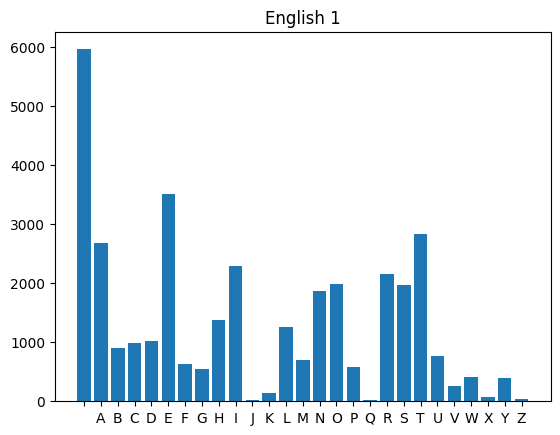

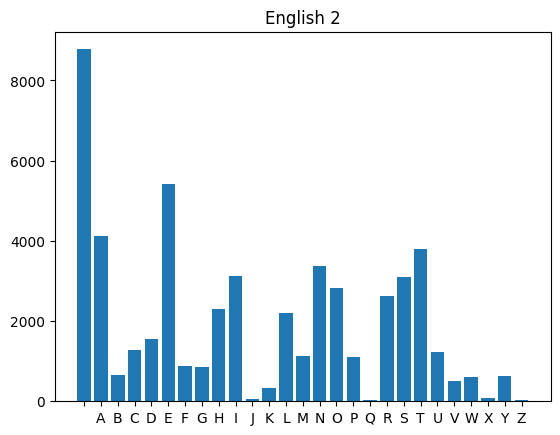

In [15]:
unigram_eng1 = Counter(ngrams(eng1, 1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2, 1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()


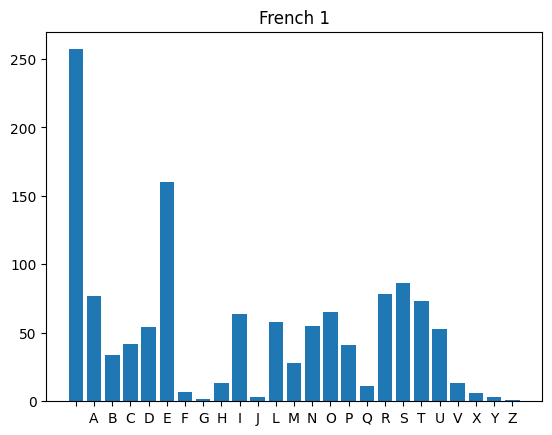

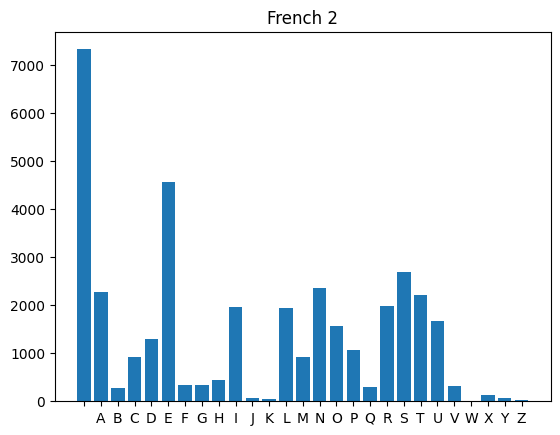

In [17]:
unigram_fr1 = Counter(ngrams(fr1, 1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2, 1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

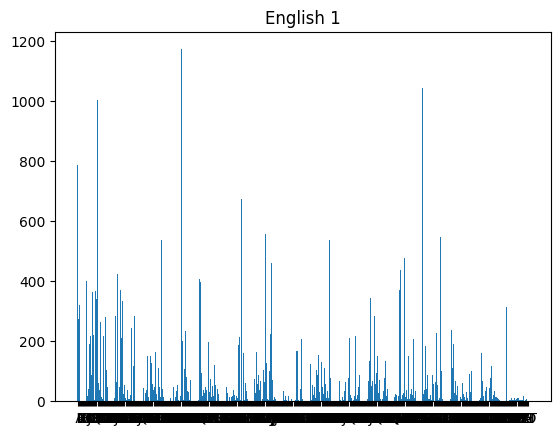

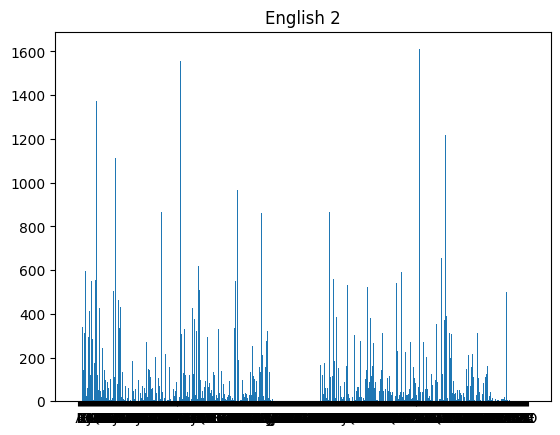

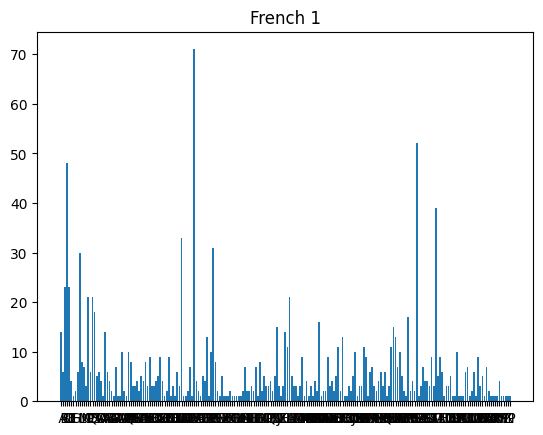

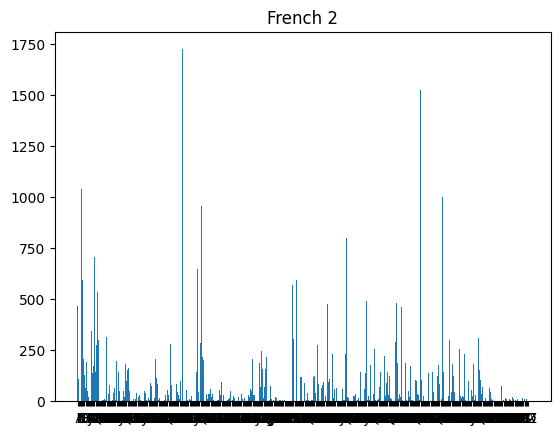

In [19]:
bigram_eng1 = Counter(ngrams(eng1, 2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2, 2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1, 2))
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2, 2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [20]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii, jj] = ngram[(chr(ord('A')+ii), chr(ord('A')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

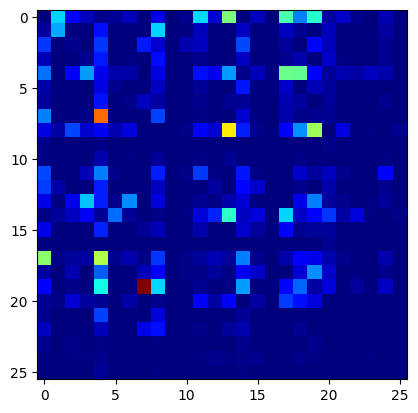

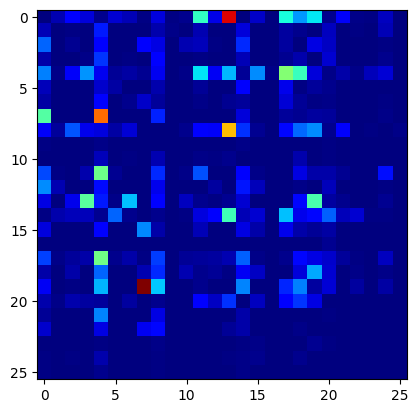

In [21]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

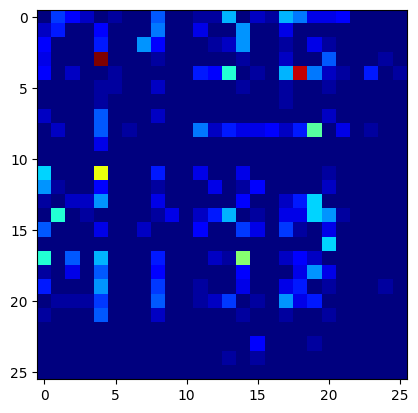

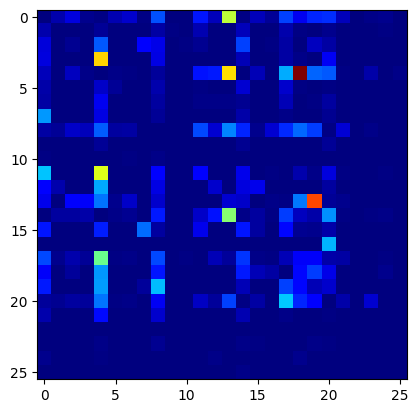

In [22]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [23]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('A')+i), chr(ord('A')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [24]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('T', 'H') : 844.0
('H', 'E') : 672.0
('I', 'N') : 555.0
('R', 'E') : 478.0
('I', 'T') : 461.0
('R', 'A') : 436.0
('A', 'N') : 423.0
('E', 'R') : 406.0
('E', 'S') : 397.0
('A', 'R') : 370.0

English 2:
('T', 'H') : 1217.0
('A', 'N') : 1115.0
('H', 'E') : 968.0
('I', 'N') : 861.0
('E', 'R') : 619.0
('R', 'E') : 590.0
('L', 'E') : 587.0
('N', 'D') : 560.0
('H', 'A') : 548.0
('N', 'T') : 534.0

French 1:
('D', 'E') : 33.0
('E', 'S') : 31.0
('L', 'E') : 21.0
('R', 'O') : 17.0
('I', 'T') : 15.0
('R', 'A') : 13.0
('O', 'B') : 13.0
('E', 'N') : 13.0
('Q', 'U') : 11.0
('L', 'A') : 11.0

French 2:
('E', 'S') : 957.0
('N', 'T') : 797.0
('D', 'E') : 656.0
('E', 'N') : 645.0
('L', 'E') : 592.0
('A', 'N') : 555.0
('O', 'N') : 492.0
('R', 'E') : 459.0
('U', 'R') : 309.0
('L', 'A') : 306.0
